In [1]:
pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python streamlit scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.5 MB/s eta 0:00:00


In [4]:
# Importing Libraries

import tensorflow as tf
import streamlit as st
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
# Libraries
import tensorflow as tf
import streamlit as st
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Extract the ZIP File

import zipfile

zip_path = "/content/drive/MyDrive/Colab Notebooks/Dataset.zip"
extract_path = "D:\Project 5"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-888194456.py:6: SyntaxWarning: invalid escape sequence '\P'
  extract_path = "D:\Project 5"


Dataset extracted successfully!


In [12]:
# Define image size
img_size = (128, 128)

# Define directories for training and validation datasets
train_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [13]:
# Check Class Distribution

import os

# Define dataset paths
train_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Function to count images per class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Count images in each dataset
train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

print("Training Data:", train_counts)
print("Validation Data:", val_counts)
print("Test Data:", test_counts)


# Why is this important?

# If any class has significantly fewer images, model might be biased.
# We may need data augmentation for balancing.

Training Data: {'animal fish': 1096, 'animal fish bass': 30, 'fish sea_food black_sea_sprat': 569, 'fish sea_food gilt_head_bream': 566, 'fish sea_food hourse_mackerel': 573, 'fish sea_food red_mullet': 579, 'fish sea_food red_sea_bream': 571, 'fish sea_food sea_bass': 538, 'fish sea_food shrimp': 576, 'fish sea_food striped_red_mullet': 547, 'fish sea_food trout': 580}
Validation Data: {'animal fish': 187, 'animal fish bass': 10, 'fish sea_food black_sea_sprat': 105, 'fish sea_food gilt_head_bream': 94, 'fish sea_food hourse_mackerel': 97, 'fish sea_food red_mullet': 90, 'fish sea_food red_sea_bream': 113, 'fish sea_food sea_bass': 97, 'fish sea_food shrimp': 100, 'fish sea_food striped_red_mullet': 101, 'fish sea_food trout': 98}
Test Data: {'animal fish': 520, 'animal fish bass': 13, 'fish sea_food black_sea_sprat': 298, 'fish sea_food gilt_head_bream': 305, 'fish sea_food hourse_mackerel': 286, 'fish sea_food red_mullet': 291, 'fish sea_food red_sea_bream': 273, 'fish sea_food sea_

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


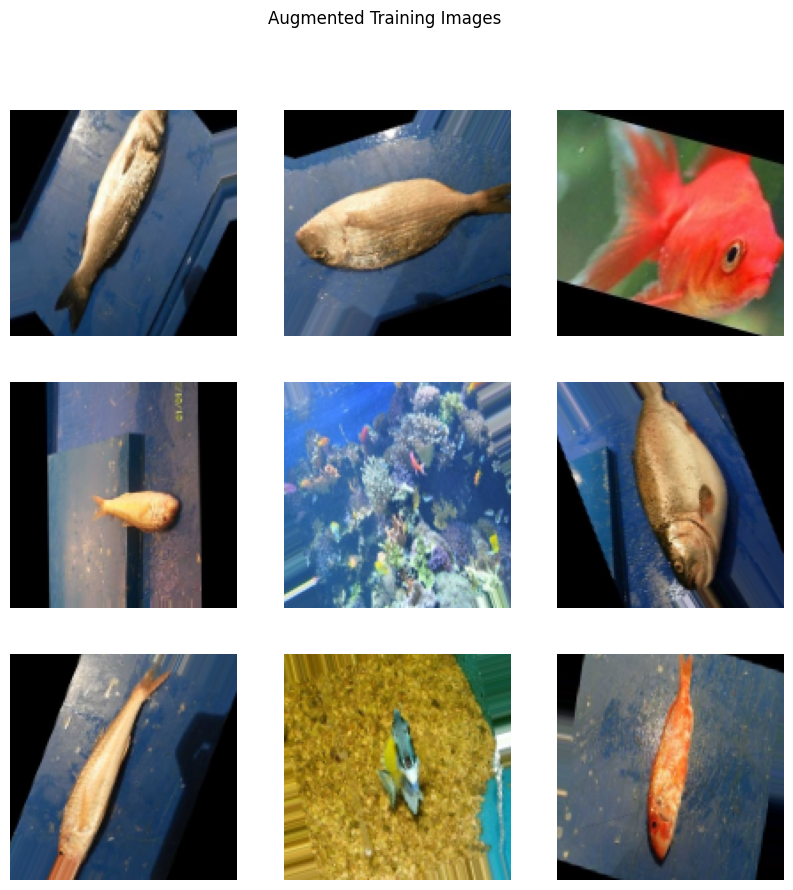

In [14]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

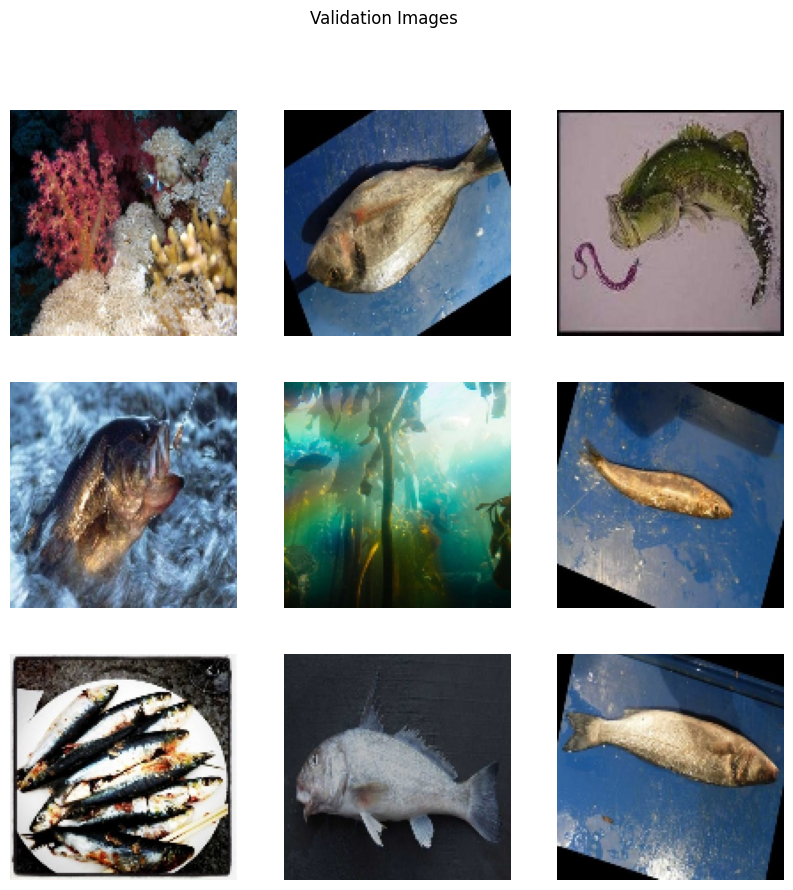

In [15]:
# Get a batch of augmented images from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

In [16]:
# Data Augmentation (Improve Model Robustness)


# Modify ImageDataGenerator to include augmentation techniques:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotate images randomly by 20 degrees
    width_shift_range=0.2,   # Shift image width by 20%
    height_shift_range=0.2,  # Shift image height by 20%
    shear_range=0.2,         # Shearing transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill empty pixels after transformation
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Apply augmentation only to training data
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)


# If dataset has less data per class, apply data augmentation to artificially increase the number of images.

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [ ]:
# Train a CNN Model from Scratch

# Define the CNN Model Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), # Conv2D: Extracts features from images.
    MaxPooling2D(2,2), # MaxPooling2D: Reduces spatial dimensions to improve efficiency.

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(), # Flatten: Converts the 2D feature maps into a 1D vector.


    Dense(128, activation='relu'), # Dense Layer: Fully connected layers for classification.
    Dropout(0.5), # Dropout: Prevents overfitting.

    Dense(len(train_data.class_indices), activation='softmax')  # Output layer (Number of classes)
]) # Softmax Output Layer: Predicts probability distribution for multiple classes.

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!nvidia-smi


Thu Oct 23 11:47:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P0             29W /   70W |    6778MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


In [ ]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
val_data = val_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Train the CNN Model

history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Start with 10 epochs, increase if needed
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 36s/step - accuracy: 0.2000 - loss: 2.3357 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 2288s 47s/step - accuracy: 0.2012 - loss: 2.3309 - val_accuracy: 0.4341 - val_loss: 1.6867
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3814 - loss: 1.7380 - val_accuracy: 0.5705 - val_loss: 1.2532
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4969 - loss: 1.4235 - val_accuracy: 0.5861 - val_loss: 1.0587
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5636 - loss: 1.2490 - val_accuracy: 0.7637 - val_loss: 0.7984
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6097 - loss: 1.1062 - val_accuracy: 0.7784 - val_loss: 0.7236
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6727 - loss: 0.9419 - val_accuracy: 0.8104 - val_loss: 0.6538
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6898 - loss: 0.8743 - val_accuracy: 0.8407 - val_loss: 0.4949
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7283 - loss: 0.7796 - val_accuracy: 0.8974 - val_loss: 0

In [ ]:
# Load and Fine-Tune a Pre-Trained Model

# VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (so they don’t get updated during training)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fish classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use Global Average Pooling instead of Flatten
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)  # Output layer

# Create final model
model_vgg16 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,843 (56.64 MB)

 Trainable params: 134,155 (524.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the Pre-Trained Model

history_vgg16 = model_vgg16.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Adjust based on results
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.1189 - loss: 2.4920 - val_accuracy: 0.1786 - val_loss: 2.1842
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.2140 - loss: 2.2693 - val_accuracy: 0.3718 - val_loss: 2.0576
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.2582 - loss: 2.1304 - val_accuracy: 0.4368 - val_loss: 1.9494
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3107 - loss: 2.0067 - val_accuracy: 0.4625 - val_loss: 1.8593
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.3577 - loss: 1.9119 - val_accuracy: 0.5614 - val_loss: 1.7742
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4077 - loss: 1.8251 - val_accuracy: 0.5568 - val_loss: 1.7025
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4375 - loss: 1.7513 - val_accuracy: 0.5861 - val_loss: 1.6380
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4768 - loss: 1.6946 - val_accuracy: 0.5980 - va

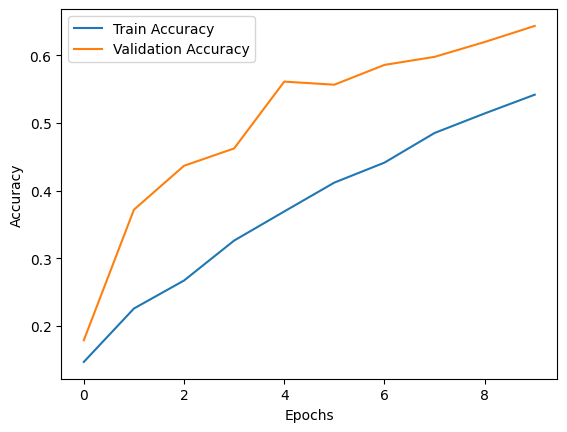

In [ ]:
# Evaluate VGG16 Model Performance

import matplotlib.pyplot as plt

plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Pre-Trained Model: ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_resnet50 = Model(inputs=base_model.input, outputs=output_layer)
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,115,083 (91.99 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_resnet50.save("resnet50_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.1156 - loss: 2.7520 - val_accuracy: 0.1712 - val_loss: 2.2960
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.1240 - loss: 2.4168 - val_accuracy: 0.1712 - val_loss: 2.2792
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1571 - loss: 2.3266 - val_accuracy: 0.1712 - val_loss: 2.2601
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.1737 - loss: 2.2887 - val_accuracy: 0.1712 - val_loss: 2.2426
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.1875 - loss: 2.2650 - val_accuracy: 0.1731 - val_loss: 2.2314
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1904 - loss: 2.2499 - val_accuracy: 0.1722 - val_loss: 2.2146
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.1818 - loss: 2.2479 - val_accuracy: 0.1712 - val_loss: 2.2066
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.1917 - loss: 2.2300 - val_accuracy: 0.1712 - val_l

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 541ms/step - accuracy: 0.1894 - loss: 2.1482
ResNet50 Model - Validation Accuracy: 0.1740, Loss: 2.1668


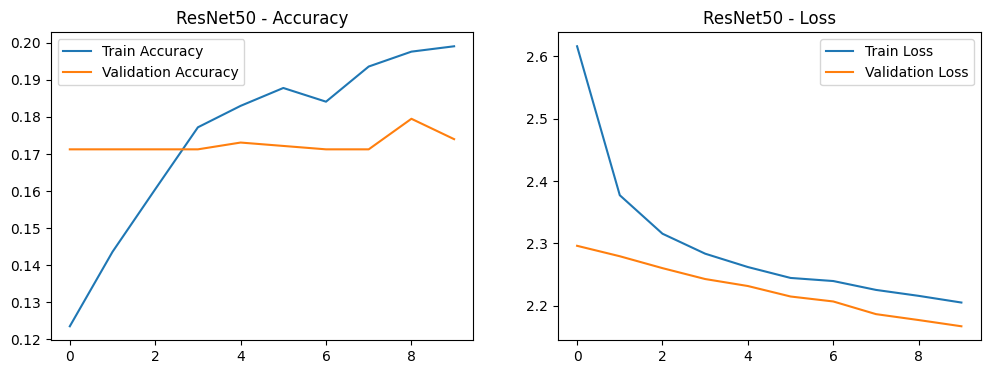

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 971ms/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.17      0.91      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.04      0.01      0.02        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.10      0.01      0.02       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.11      0.09      0.10        98

                        accuracy  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate ResNet50 Model

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on validation data
resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_data)
print(f"ResNet50 Model - Validation Accuracy: {resnet50_accuracy:.4f}, Loss: {resnet50_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title("ResNet50 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title("ResNet50 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_data), axis=1)
y_true_resnet50 = val_data.classes

print("Classification Report for ResNet50:")
print(classification_report(y_true_resnet50, y_pred_resnet50, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for ResNet50:")
print(confusion_matrix(y_true_resnet50, y_pred_resnet50))

In [ ]:
# Pre-Trained Model: MobileNet


from tensorflow.keras.applications import MobileNet

# Load MobileNet without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_mobilenet = Model(inputs=base_model.input, outputs=output_layer)
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_mobilenet.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,494,091 (13.33 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Train MobileNet Model

# Train the MobileNet model
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_mobilenet.save("mobilenet_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.1703 - loss: 2.9191 - val_accuracy: 0.6886 - val_loss: 1.2887
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5235 - loss: 1.4361 - val_accuracy: 0.8782 - val_loss: 0.7440
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7081 - loss: 0.9510 - val_accuracy: 0.9304 - val_loss: 0.5036
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7864 - loss: 0.7250 - val_accuracy: 0.9451 - val_loss: 0.3685
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8217 - loss: 0.5848 - val_accuracy: 0.9524 - val_loss: 0.2888
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8579 - loss: 0.4940 - val_accuracy: 0.9679 - val_loss: 0.2305
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8789 - loss: 0.4169 - val_accuracy: 0.9707 - val_loss: 0.1930
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9012 - loss: 0.3493 - val_accuracy: 0.9707 - val_los

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 607ms/step - accuracy: 0.9803 - loss: 0.1203
MobileNet Model - Validation Accuracy: 0.9789, Loss: 0.1195


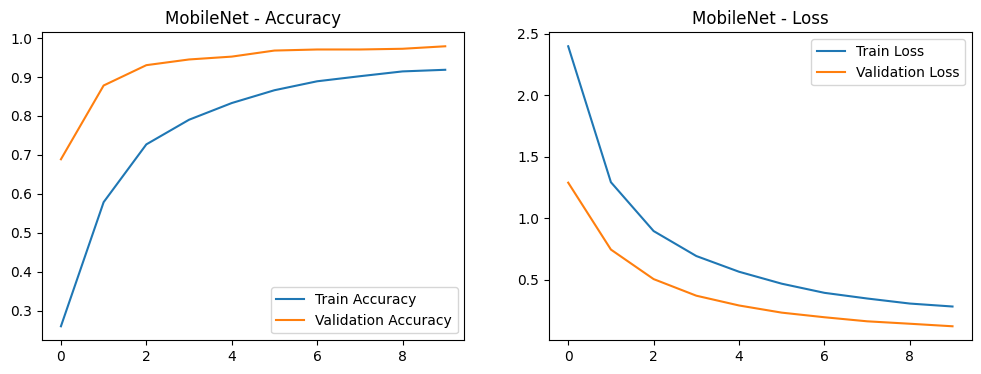

9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.21      0.22      0.21       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.13      0.13      0.13       105
   fish sea_food gilt_head_bream       0.09      0.09      0.09        94
   fish sea_food hourse_mackerel       0.05      0.05      0.05        97
        fish sea_food red_mullet       0.09      0.09      0.09        90
     fish sea_food red_sea_bream       0.14      0.14      0.14       113
          fish sea_food sea_bass       0.09      0.09      0.09        97
            fish sea_food shrimp       0.12      0.12      0.12       100
fish sea_food striped_red_mullet       0.11      0.11      0.11       101
             fish sea_food trout       0.13      0.13      0.13        98

                        accuracy    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate MobileNet Model

# Evaluate on validation data
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_data)
print(f"MobileNet Model - Validation Accuracy: {mobilenet_accuracy:.4f}, Loss: {mobilenet_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title("MobileNet - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title("MobileNet - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_data), axis=1)
y_true_mobilenet = val_data.classes

print("Classification Report for MobileNet:")
print(classification_report(y_true_mobilenet, y_pred_mobilenet, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for MobileNet:")
print(confusion_matrix(y_true_mobilenet, y_pred_mobilenet))

In [ ]:
# Pre-Trained Model: InceptionV3

from tensorflow.keras.applications import InceptionV3

# Load InceptionV3 without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_inceptionv3 = Model(inputs=base_model.input, outputs=output_layer)
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_inceptionv3.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_6[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,330,155 (85.18 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Train InceptionV3 Model

# Train the InceptionV3 model
history_inceptionv3 = model_inceptionv3.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_inceptionv3.save("inceptionv3_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.1889 - loss: 2.6923 - val_accuracy: 0.7857 - val_loss: 1.0805
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6061 - loss: 1.2140 - val_accuracy: 0.8819 - val_loss: 0.6081
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7332 - loss: 0.8257 - val_accuracy: 0.9038 - val_loss: 0.4454
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7981 - loss: 0.6596 - val_accuracy: 0.9093 - val_loss: 0.3703
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8284 - loss: 0.5586 - val_accuracy: 0.9231 - val_loss: 0.3212
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8461 - loss: 0.4900 - val_accuracy: 0.9377 - val_loss: 0.2713
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8533 - loss: 0.4526 - val_accuracy: 0.9423 - val_loss: 0.2487
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8708 - loss: 0.4080 - val_accuracy: 0.9533 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step - accuracy: 0.9418 - loss: 0.2022
InceptionV3 Model - Validation Accuracy: 0.9478, Loss: 0.1971


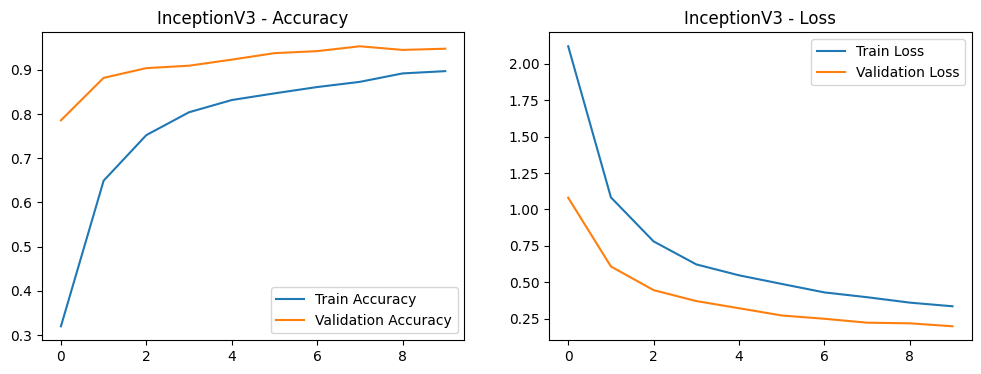

9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.22      0.23      0.23       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.08      0.08      0.08       105
   fish sea_food gilt_head_bream       0.12      0.12      0.12        94
   fish sea_food hourse_mackerel       0.10      0.10      0.10        97
        fish sea_food red_mullet       0.08      0.09      0.09        90
     fish sea_food red_sea_bream       0.05      0.04      0.04       113
          fish sea_food sea_bass       0.11      0.11      0.11        97
            fish sea_food shrimp       0.08      0.08      0.08       100
fish sea_food striped_red_mullet       0.10      0.10      0.10       101
             fish sea_food trout       0.08      0.08      0.08        98

                        accuracy  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate InceptionV3 Model

# Evaluate on validation data
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_data)
print(f"InceptionV3 Model - Validation Accuracy: {inceptionv3_accuracy:.4f}, Loss: {inceptionv3_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inceptionv3.history['accuracy'], label='Train Accuracy')
plt.plot(history_inceptionv3.history['val_accuracy'], label='Validation Accuracy')
plt.title("InceptionV3 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inceptionv3.history['loss'], label='Train Loss')
plt.plot(history_inceptionv3.history['val_loss'], label='Validation Loss')
plt.title("InceptionV3 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_data), axis=1)
y_true_inceptionv3 = val_data.classes

print("Classification Report for InceptionV3:")
print(classification_report(y_true_inceptionv3, y_pred_inceptionv3, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for InceptionV3:")
print(confusion_matrix(y_true_inceptionv3, y_pred_inceptionv3))

In [ ]:
# Pre-Trained Model: EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_efficientnetb0 = Model(inputs=base_model.input, outputs=output_layer)
model_efficientnetb0.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_efficientnetb0.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,380,334 (16.71 MB)

 Trainable params: 330,763 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Train EfficientNetB0 Model

# Train the EfficientNetB0 model
history_efficientnetb0 = model_efficientnetb0.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_efficientnetb0.save("efficientnetb0_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.1414 - loss: 2.3683 - val_accuracy: 0.1712 - val_loss: 2.3163
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1682 - loss: 2.3333 - val_accuracy: 0.1712 - val_loss: 2.3146
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1771 - loss: 2.3206 - val_accuracy: 0.1712 - val_loss: 2.3154
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1727 - loss: 2.3149 - val_accuracy: 0.1712 - val_loss: 2.3104
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1685 - loss: 2.3149 - val_accuracy: 0.1712 - val_loss: 2.3114
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.1686 - loss: 2.3171 - val_accuracy: 0.1712 - val_loss: 2.3099
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1782 - loss: 2.3099 - val_accuracy: 0.1712 - val_loss: 2.3119
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.1752 - loss: 2.3148 - val_accuracy: 0.1712 - val_los

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - accuracy: 0.1619 - loss: 2.3158
EfficientNetB0 Model - Validation Accuracy: 0.1712, Loss: 2.3125


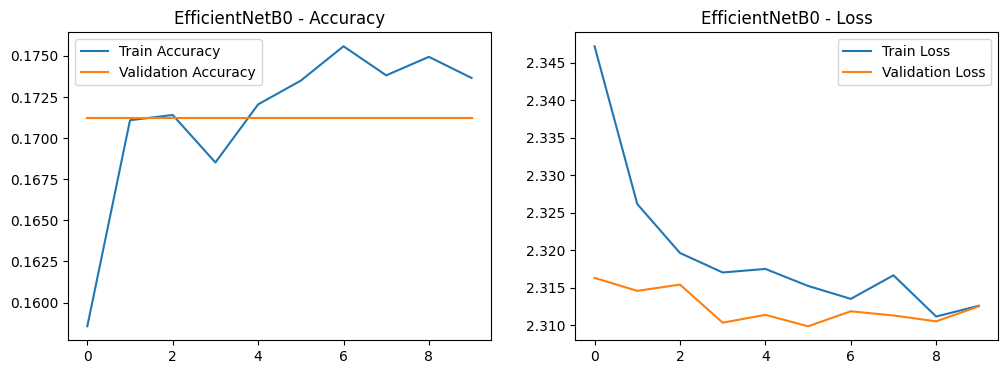

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate EfficientNetB0 Model

# Evaluate on validation data
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_data)
print(f"EfficientNetB0 Model - Validation Accuracy: {efficientnetb0_accuracy:.4f}, Loss: {efficientnetb0_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_efficientnetb0.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnetb0.history['val_accuracy'], label='Validation Accuracy')
plt.title("EfficientNetB0 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_efficientnetb0.history['loss'], label='Train Loss')
plt.plot(history_efficientnetb0.history['val_loss'], label='Validation Loss')
plt.title("EfficientNetB0 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_data), axis=1)
y_true_efficientnetb0 = val_data.classes

print("Classification Report for EfficientNetB0:")
print(classification_report(y_true_efficientnetb0, y_pred_efficientnetb0, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for EfficientNetB0:")
print(confusion_matrix(y_true_efficientnetb0, y_pred_efficientnetb0))

In [ ]:
# Define & Store the CNN Model Before Evaluation

model_cnn = cnn_model  # Assign your CNN model to this variable

In [ ]:
# Evaluate CNN Performance

cnn_loss, cnn_accuracy = model_cnn.evaluate(val_data)
print(f"CNN Model - Validation Accuracy: {cnn_accuracy:.4f}, Loss: {cnn_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.8790 - loss: 0.3862
CNN Model - Validation Accuracy: 0.8901, Loss: 0.3665


In [ ]:
# Evaluate VGG16 Model

vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(val_data)
print(f"VGG16 - Validation Accuracy: {vgg16_accuracy:.4f}, Loss: {vgg16_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.6493 - loss: 1.4481
VGG16 - Validation Accuracy: 0.6438, Loss: 1.4624


In [ ]:
# Ensure Other Models Are Also Evaluated

resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_data)
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_data)
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_data)
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_data)
cnn_loss, cnn_accuracy = model_cnn.evaluate(val_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step - accuracy: 0.1853 - loss: 2.1543
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step - accuracy: 0.9853 - loss: 0.1130
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 558ms/step - accuracy: 0.9497 - loss: 0.1931
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 502ms/step - accuracy: 0.1846 - loss: 2.3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 527ms/step - accuracy: 0.8912 - loss: 0.3832


In [ ]:
# Compare All Models in a Table

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)


 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.978938         0.119456
4     InceptionV3             0.947802         0.197136
0   CNN (Scratch)             0.890110         0.366479
1           VGG16             0.643773         1.462403
2        ResNet50             0.173993         2.166809
5  EfficientNetB0             0.171245         2.312529


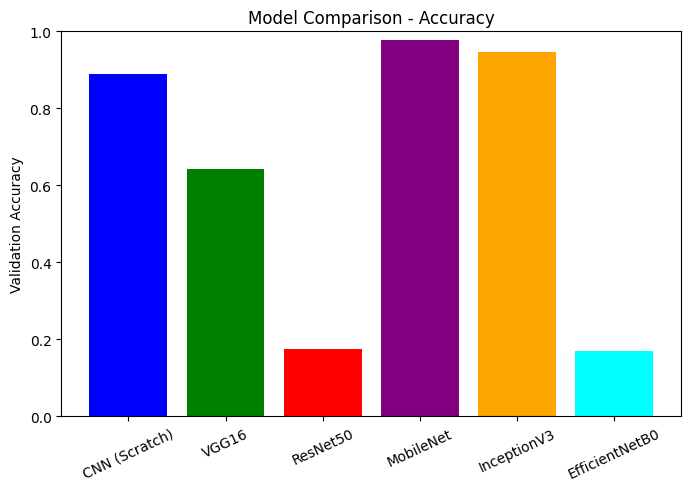

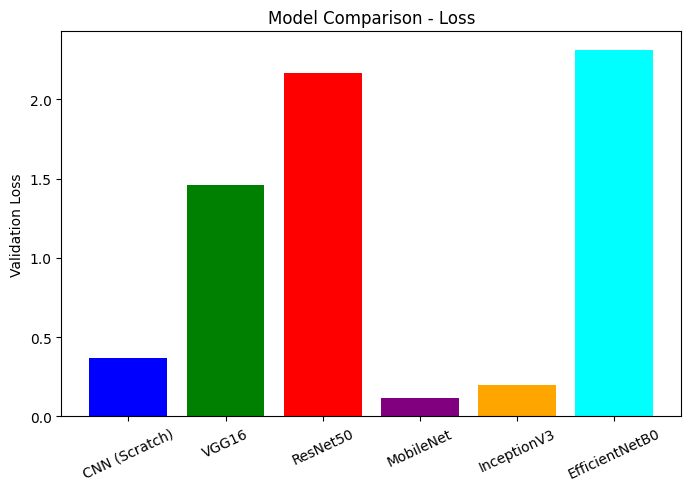

In [ ]:
# Visualizing Model Performance (Accuracy & Loss)

import matplotlib.pyplot as plt

# Model Names
models = ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]

# Accuracy and Loss Values
accuracies = [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy]
losses = [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=25)
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, losses, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Loss")
plt.title("Model Comparison - Loss")
plt.xticks(rotation=25)
plt.show()

In [ ]:
# Identify the Best Model Based on Accuracy & Loss

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)

# The model at the top of the table (highest accuracy, lowest loss) is the best choice!


 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.978938         0.119456
4     InceptionV3             0.947802         0.197136
0   CNN (Scratch)             0.890110         0.366479
1           VGG16             0.643773         1.462403
2        ResNet50             0.173993         2.166809
5  EfficientNetB0             0.171245         2.312529


In [ ]:
# Check Precision, Recall, and F1-score for Balanced Performance

# Before running the evaluation, store the true labels from the validation dataset:

# Get the actual labels from the validation data
y_true = val_data.classes  # Ground truth labels

In [ ]:
# Get Predictions for All Models

import numpy as np

# Get predicted labels for each model
y_pred_cnn = np.argmax(model_cnn.predict(val_data), axis=1)
y_pred_vgg16 = np.argmax(model_vgg16.predict(val_data), axis=1)
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_data), axis=1)
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_data), axis=1)
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_data), axis=1)
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_data), axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 508ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 570ms/step


In [ ]:
# Check Classification Report for Each Model

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification reports
print("\n Classification Report for CNN:")
print(classification_report(y_true, y_pred_cnn, target_names=class_labels))

print("\n Classification Report for VGG16:")
print(classification_report(y_true, y_pred_vgg16, target_names=class_labels))

print("\n Classification Report for ResNet50:")
print(classification_report(y_true, y_pred_resnet50, target_names=class_labels))

print("\n Classification Report for MobileNet:")
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

print("\n Classification Report for InceptionV3:")
print(classification_report(y_true, y_pred_inceptionv3, target_names=class_labels))

print("\n Classification Report for EfficientNetB0:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))


 Classification Report for CNN:
                                  precision    recall  f1-score   support

                     animal fish       0.16      0.17      0.16       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.08      0.09      0.09       105
   fish sea_food gilt_head_bream       0.10      0.10      0.10        94
   fish sea_food hourse_mackerel       0.07      0.07      0.07        97
        fish sea_food red_mullet       0.07      0.07      0.07        90
     fish sea_food red_sea_bream       0.06      0.08      0.07       113
          fish sea_food sea_bass       0.07      0.04      0.05        97
            fish sea_food shrimp       0.07      0.07      0.07       100
fish sea_food striped_red_mullet       0.11      0.11      0.11       101
             fish sea_food trout       0.10      0.11      0.11        98

                        accuracy                           0.10      1092
   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
# Check Precision, Recall, and F1-score for Balanced Performance

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification reports
print("\n Classification Report for Best Model:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))

# Look for balanced Precision, Recall, and F1-score across all classes.
# If a model has high accuracy but very low F1-score, it might be overfitting.


 Classification Report for Best Model:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17      1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


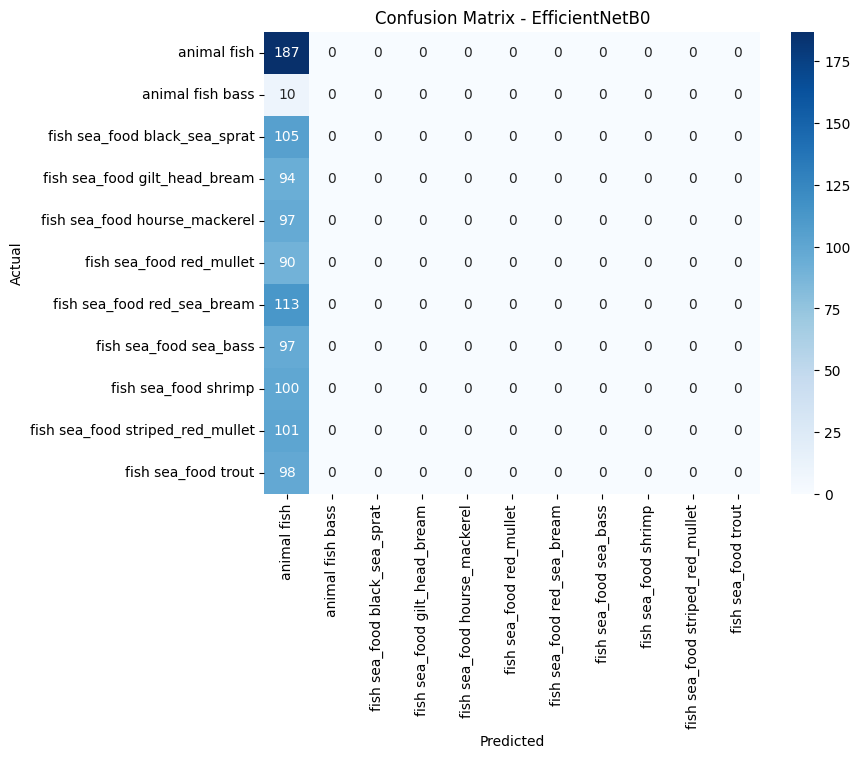

In [ ]:
# Check Confusion Matrix for the Best Model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Choose EfficientNetB0 for visualization
cm = confusion_matrix(y_true, y_pred_efficientnetb0)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


# If a model misclassifies many images, it may not generalize well.
# Choose a model with fewer misclassifications.

In [ ]:
# Save the best model (MobileNet) for deployment.

model_mobilenet.save("mobilenet_fish_model.keras")


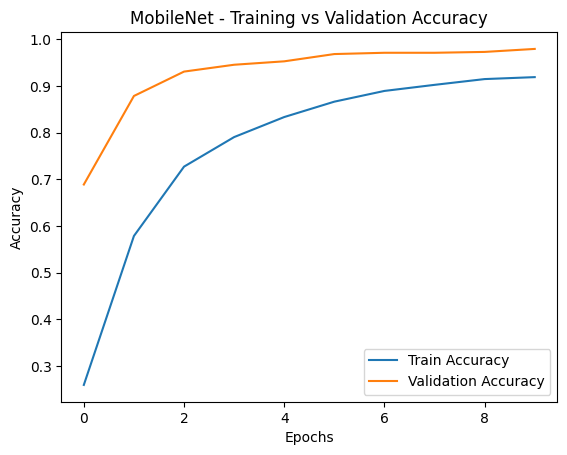

In [ ]:
# Check if the Model is Overfitting


import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("MobileNet - Training vs Validation Accuracy")
plt.show()

# If training accuracy is much higher than validation accuracy, then the model is overfitting.

In [ ]:
# Increase Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Improved Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Helps the model learn better variations in fish images.

In [ ]:
# Balance the Dataset (Class Imbalance Issue)

# Check if some fish categories have too few images compared to others:


import os

# Path to train folder
train_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# Count images per class (ignore files like .DS_Store)
class_counts = {
    class_name: len(os.listdir(os.path.join(train_path, class_name)))
    for class_name in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, class_name))  # Only count directories
}

# Print the class distribution
print("Class Distribution in Training Data:")
print(class_counts)

# If one category has far more images than others, you may need to:

# Add more data (by collecting more images or applying augmentation).
# Use Class Weights during training to balance the importance of different categories.

Class Distribution in Training Data:
{'animal fish': 1096, 'animal fish bass': 30, 'fish sea_food black_sea_sprat': 569, 'fish sea_food gilt_head_bream': 566, 'fish sea_food hourse_mackerel': 573, 'fish sea_food red_mullet': 579, 'fish sea_food red_sea_bream': 571, 'fish sea_food sea_bass': 538, 'fish sea_food shrimp': 576, 'fish sea_food striped_red_mullet': 547, 'fish sea_food trout': 580}


In [ ]:
# Fine-Tune MobileNet Instead of Using Frozen Layers

# MobileNet model may be not adapting well to fish classification because we froze the pre-trained layers.

# Try fine-tuning MobileNet by unfreezing some layers:

# Unfreeze last few layers for fine-tuning
for layer in model_mobilenet.layers[-20:]:  # Unfreezing last 20 layers
    layer.trainable = True

# Recompile the model
from tensorflow.keras.optimizers import Adam

model_mobilenet.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Why?

# Allows the model to adapt to fish classification rather than relying only on ImageNet features.

In [ ]:
# Fixing Class Imbalance

# Use Class Weights to Balance Training

# "Since "animal fish bass" has very few images, we should give it more importance by assigning higher class weights."

# Calculate Class Weights Automatically:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class labels
class_labels = list(train_data.class_indices.keys())

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

# Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Computed Class Weights:", class_weights_dict)

Computed Class Weights: {0: np.float64(0.5163404114134041), 1: np.float64(18.863636363636363), 2: np.float64(0.9945678223358364), 3: np.float64(0.9998393832316094), 4: np.float64(0.9876249405045217), 5: np.float64(0.9773904851625059), 6: np.float64(0.9910842222576023), 7: np.float64(1.0518756336600203), 8: np.float64(0.9824810606060606), 9: np.float64(1.0345687219544624), 10: np.float64(0.975705329153605)}


In [ ]:
# apply class weights while training:

history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights_dict  # Apply class weights
)

# This helps the model learn smaller classes better instead of predicting "animal fish" for everything.

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.3104 - loss: 3.4077 - val_accuracy: 0.9771 - val_loss: 0.1172
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6200 - loss: 1.5949 - val_accuracy: 0.9753 - val_loss: 0.1066
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8081 - loss: 0.7412 - val_accuracy: 0.9826 - val_loss: 0.0955
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8791 - loss: 0.4224 - val_accuracy: 0.9835 - val_loss: 0.0890
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9019 - loss: 0.3251 - val_accuracy: 0.9826 - val_loss: 0.0858
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9138 - loss: 0.2915 - val_accuracy: 0.9817 - val_loss: 0.0852
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9170 - loss: 0.2621 - val_accuracy: 0.9789 - val_loss: 0.0842
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9291 - loss: 0.2173 - val_accuracy: 0.9799 - val_lo

In [ ]:
# Manually Augment Only "animal fish bass"

# If you want to augment only the "animal fish bass" category, use flow_from_dataframe() instead of flow_from_directory().


# Load Image Filenames & Labels for "animal fish bass"

import pandas as pd

# Path to the minority class
minority_class_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish bass"
# Get all image filenames
image_files = [os.path.join(minority_class_path, f) for f in os.listdir(minority_class_path) if f.endswith('.jpg')]

# Create a dataframe with image paths and labels
df_minority = pd.DataFrame({"filename": image_files, "class": "animal fish bass"})

In [ ]:
# Use flow_from_dataframe() to Augment Only "animal fish bass"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation for only "animal fish bass"
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images from the dataframe
train_generator = datagen.flow_from_dataframe(
    dataframe=df_minority,
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=128,
    save_to_dir=minority_class_path,  # Save augmented images in the same folder
    save_format='jpg'
)

Found 30 validated image filenames belonging to 1 classes.


In [ ]:
# Train the Model with Updated Data

# Re-initialize the data generators after augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the updated training and validation data
train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=128, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=128, class_mode='categorical')

# Train the model again
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Save the retrained model
model_mobilenet.save("mobilenet_fish_model_augmented.keras")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 952ms/step - accuracy: 0.9590 - loss: 0.1379 - val_accuracy: 0.9844 - val_loss: 0.0634
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 691ms/step - accuracy: 0.9636 - loss: 0.1224 - val_accuracy: 0.9872 - val_loss: 0.0528
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 679ms/step - accuracy: 0.9710 - loss: 0.1068 - val_accuracy: 0.9881 - val_loss: 0.0466
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 695ms/step - accuracy: 0.9744 - loss: 0.0970 - val_accuracy: 0.9918 - val_loss: 0.0429
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 680ms/step - accuracy: 0.9769 - loss: 0.0900 - val_accuracy: 0.9945 - val_loss: 0.0404
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 695ms/step - accuracy: 0.9826 - loss: 0.0773 - val_accuracy: 0.9945 - val_loss: 0.0387
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 681ms/step - accuracy: 0.9781 - loss: 0.0784 - val_accuracy: 0.9954 - val_loss: 0.0368
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 690ms/step - accuracy: 0.9795 - loss: 0.0762 - val_accu

In [ ]:
# Evaluating the New Model After Augmentation

# Evaluate Model Accuracy & Loss

# Evaluate the model on validation data
augmented_loss, augmented_accuracy = model_mobilenet.evaluate(val_data)

print(f" MobileNet (Augmented) - Validation Accuracy: {augmented_accuracy:.4f}")
print(f" MobileNet (Augmented) - Validation Loss: {augmented_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - accuracy: 0.9967 - loss: 0.0330
 MobileNet (Augmented) - Validation Accuracy: 0.9963
 MobileNet (Augmented) - Validation Loss: 0.0324


In [ ]:
# Generate Predictions for Classification Report & Confusion Matrix

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels
y_true = val_data.classes

# Get predicted labels from the model
y_pred_augmented = np.argmax(model_mobilenet.predict(val_data), axis=1)

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification report
print("\n Classification Report for MobileNet (Augmented):")
print(classification_report(y_true, y_pred_augmented, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step

 Classification Report for MobileNet (Augmented):
                                  precision    recall  f1-score   support

                     animal fish       0.18      0.18      0.18       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.04      0.04      0.04       105
   fish sea_food gilt_head_bream       0.06      0.06      0.06        94
   fish sea_food hourse_mackerel       0.09      0.09      0.09        97
        fish sea_food red_mullet       0.11      0.11      0.11        90
     fish sea_food red_sea_bream       0.10      0.10      0.10       113
          fish sea_food sea_bass       0.06      0.06      0.06        97
            fish sea_food shrimp       0.11      0.11      0.11       100
fish sea_food striped_red_mullet       0.10      0.10      0.10       101
             fish sea_food trout       0.09      0.09      0.09        98

                      

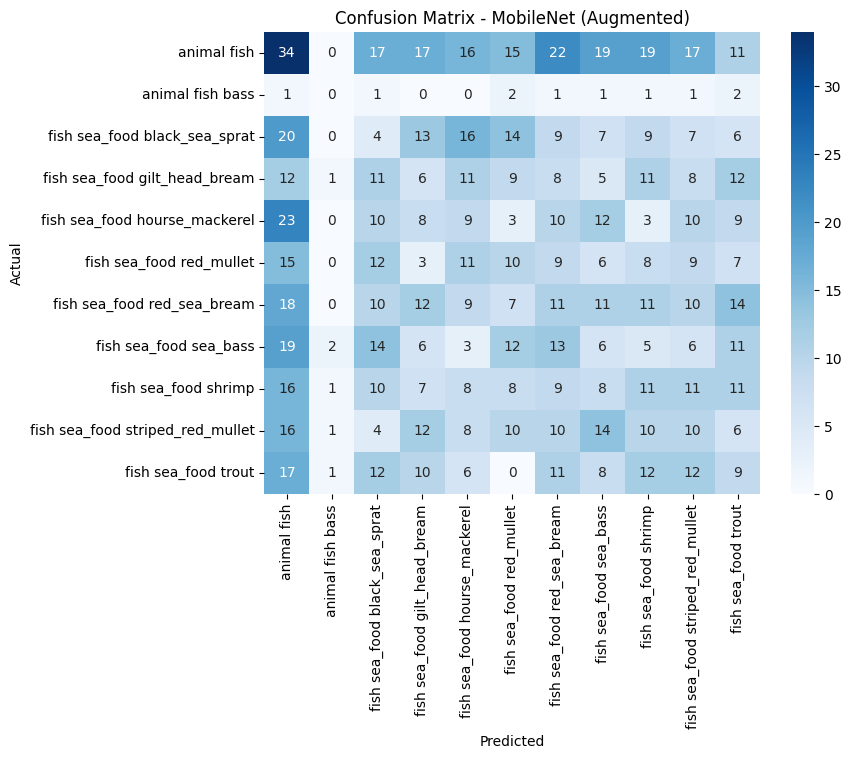

In [ ]:
# Plot Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_augmented)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNet (Augmented)")
plt.show()

In [ ]:
# Compare Old vs. New Model Performance

import pandas as pd

# Store model results in a dictionary
model_comparison = {
    "Model": ["MobileNet (Before Augmentation)", "MobileNet (After Augmentation)"],
    "Validation Accuracy": [mobilenet_accuracy, augmented_accuracy],
    "Validation Loss": [mobilenet_loss, augmented_loss]
}

# Convert to DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Display the results
print("\n Model Comparison Table:")
print(df_comparison)

# What to Look For?

# If Validation Accuracy increased, the new model is better.
# If Validation Loss decreased, the new model generalizes better.
# If F1-score improved, the model is learning all classes more evenly.


 Model Comparison Table:
                             Model  Validation Accuracy  Validation Loss
0  MobileNet (Before Augmentation)             0.978938         0.119456
1   MobileNet (After Augmentation)             0.996337         0.032439


In [ ]:
# New Model is Better, Save it for Deployment

model_mobilenet.save("mobilenet_fish_final.keras")

In [7]:
!pip install streamlit-option-menu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 13.5 MB/s eta 0:00:00


In [8]:
%%writefile app.py
# ------------------------------------------------------------
# 🐟 Multiclass Fish Image Classification Dashboard (Streamlit)
# ------------------------------------------------------------

import streamlit as st
from streamlit_option_menu import option_menu
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ------------------------------------------------------------
# Streamlit Page Setup
# ------------------------------------------------------------
st.set_page_config(page_title="Fish Classification", page_icon="🐟", layout="wide")

# ------------------------------------------------------------
# Sidebar Navigation
# ------------------------------------------------------------
with st.sidebar:
    selected = option_menu(
        menu_title="Navigation",
        options=["Upload Image", "Classify"],
        icons=["cloud-upload", "search"],
        menu_icon="cast",
        default_index=0,
        styles={
            "container": {"padding": "5px", "background-color": "#E6E6FA"},
            "icon": {"color": "#FF00FF", "font-size": "18px"},
            "nav-link": {
                "font-size": "16px",
                "text-align": "left",
                "margin": "0px",
                "color": "#333",
                "padding": "10px",
                "border-radius": "8px",
            },
            "nav-link-selected": {"background-color": "#DDA0DD", "color": "white"},
        },
    )

# ------------------------------------------------------------
# UPLOAD IMAGE PAGE
# ------------------------------------------------------------
if selected == "Upload Image":
    st.markdown("<h1 style='color: #C71585;'>📤 Upload an Image for Classification</h1>", unsafe_allow_html=True)
    uploaded_file = st.file_uploader("Choose a fish image...", type=["jpg", "png", "jpeg"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_container_width=True)

        # Preprocess
        img_array = np.array(image.resize((224, 224))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Load trained model
        model_path = "/content/mobilenet_fish_final.keras"  # <-- change to your model path
        model = tf.keras.models.load_model(model_path)

        # Predict
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]

        class_labels = [
            "animal fish", "animal fish bass", "fish sea_food black_sea_sprat",
            "fish sea_food gilt_head_bream", "fish sea_food hourse_mackerel",
            "fish sea_food red_mullet", "fish sea_food red_sea_bream",
            "fish sea_food sea_bass", "fish sea_food shrimp",
            "fish sea_food striped_red_mullet", "fish sea_food trout"
        ]

        predicted_label = class_labels[predicted_class]
        confidence = np.max(prediction) * 100

        st.subheader(f"🎯 Predicted Fish Species: **{predicted_label}**")
        st.write(f"🔍 Confidence Score: **{confidence:.2f}%**")

# ------------------------------------------------------------
# CLASSIFY PAGE
# ------------------------------------------------------------
elif selected == "Classify":
    st.markdown("<h1 style='color: #C71585;'>🔍 Classify Fish Species</h1>", unsafe_allow_html=True)
    uploaded_file = st.file_uploader("Upload a fish image for classification...", type=["jpg", "png", "jpeg"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_container_width=True)

        img_array = np.array(image.resize((224, 224))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        model_path = "/content/mobilenet_fish_final.keras"  # <-- change to your model path
        model = tf.keras.models.load_model(model_path)

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]

        class_labels = [
            "animal fish", "animal fish bass", "fish sea_food black_sea_sprat",
            "fish sea_food gilt_head_bream", "fish sea_food hourse_mackerel",
            "fish sea_food red_mullet", "fish sea_food red_sea_bream",
            "fish sea_food sea_bass", "fish sea_food shrimp",
            "fish sea_food striped_red_mullet", "fish sea_food trout"
        ]

        predicted_label = class_labels[predicted_class]
        confidence_score = np.max(predictions) * 100

        st.subheader(f"🎯 Predicted Fish Species: **{predicted_label}**")
        st.write(f"🔍 Confidence Score: **{confidence_score:.2f}%**")

        st.subheader("📊 Confidence Scores for All Classes")
        for i, label in enumerate(class_labels):
            st.write(f"**{label}:** {predictions[0][i] * 100:.2f}%")


Overwriting app.py


In [9]:
# ============================================================
# 🚀 Run Streamlit inside Google Colab (any app file you choose)
# ============================================================

# 1️⃣ Install dependencies (only needed once)
!pip install streamlit pyngrok --quiet

# 2️⃣ Import & setup ngrok
import os
from pyngrok import ngrok

# (Optional) Stop any existing tunnels
ngrok.kill()

# (🔒 replace with your own Ngrok auth token from dashboard.ngrok.com)
NGROK_AUTH_TOKEN = "34Q25J6mc3d2R6Kynlaw3J22WJY_7vo3DE64A4FCDAKTcYXPE"

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# 3️⃣ Environment tweaks so Streamlit behaves in Colab
os.environ["BROWSER"] = "none"
os.environ["STREAMLIT_GATHER_USAGE_STATS"] = "false"

# 4️⃣ Choose a port and start Streamlit in background
PORT = 8508
!streamlit run /content/app.py --server.port {PORT} &>/dev/null &

# 5️⃣ Create a tunnel and show the link
public_url = ngrok.connect(addr=PORT, proto="http")
print(f"🌐 Streamlit App is live at:\n👉 {public_url.public_url}")

🌐 Streamlit App is live at:
👉 https://unbaked-apomictically-fransisca.ngrok-free.dev
